In [6]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
input_file = 'final.csv'  # Path to the sorted references CSV
df = pd.read_csv(input_file)

# Step 1: Create a matrix (pivot table) of how many times each author referenced another author
# Pivot the data with author_of_book as the row and full_author_referenced as the column
author_reference_matrix = df.pivot_table(index='author_of_book', columns='full_author_referenced', aggfunc='size', fill_value=0)

# Step 2: Count how many times each author referenced another author (row sums)
authors_making_references = author_reference_matrix.sum(axis=1)

# Step 3: Count how many times each author was referenced (column sums)
authors_referenced = author_reference_matrix.sum(axis=0)

# Step 4: Get the top 30 authors who made the most references
top_30_authors_making_references = authors_making_references.sort_values(ascending=False).head(20)

# Step 5: Get the top 10 authors who were referenced the most
top_10_authors_referenced = authors_referenced.sort_values(ascending=False).head(200)

# Step 6: Print the results
print("Top 20 Authors Who Made the Most References:")
for author, count in top_30_authors_making_references.items():
    print(f"{author}: {count} references made")

print("\nTop 20 Authors Who Were Referenced the Most:")
for author, count in top_10_authors_referenced.items():
    print(f"{author}: {count} references received")

Top 20 Authors Who Made the Most References:
Grote, George: 13203 references made
Tyerman, L. (Luke): 4661 references made
Hegel, Georg Wilhelm Friedrich: 3777 references made
Aquinas: 3736 references made
Dewey: 2628 references made
Frazer: 2598 references made
Grisar, Hartmann: 2522 references made
Schopenhauer, Arthur: 2308 references made
Ingersoll, Robert Green: 2238 references made
Nietzsche, Friedrich Wilhelm: 2057 references made
Blavatsky: 1890 references made
Voltaire: 1849 references made
Croce: 1800 references made
Plutarch: 1731 references made
Falckenberg: 1663 references made
Westermarck, Edward: 1646 references made
Husik, Isaac: 1415 references made
Mill, John Stuart: 1223 references made
Hume, David: 1214 references made
Santayana, George: 1214 references made

Top 20 Authors Who Were Referenced the Most:
Plato: 15725 references received
Aristotle: 8997 references received
Augustine: 5578 references received
Kant, Immanuel: 4710 references received
Whitefield, George:

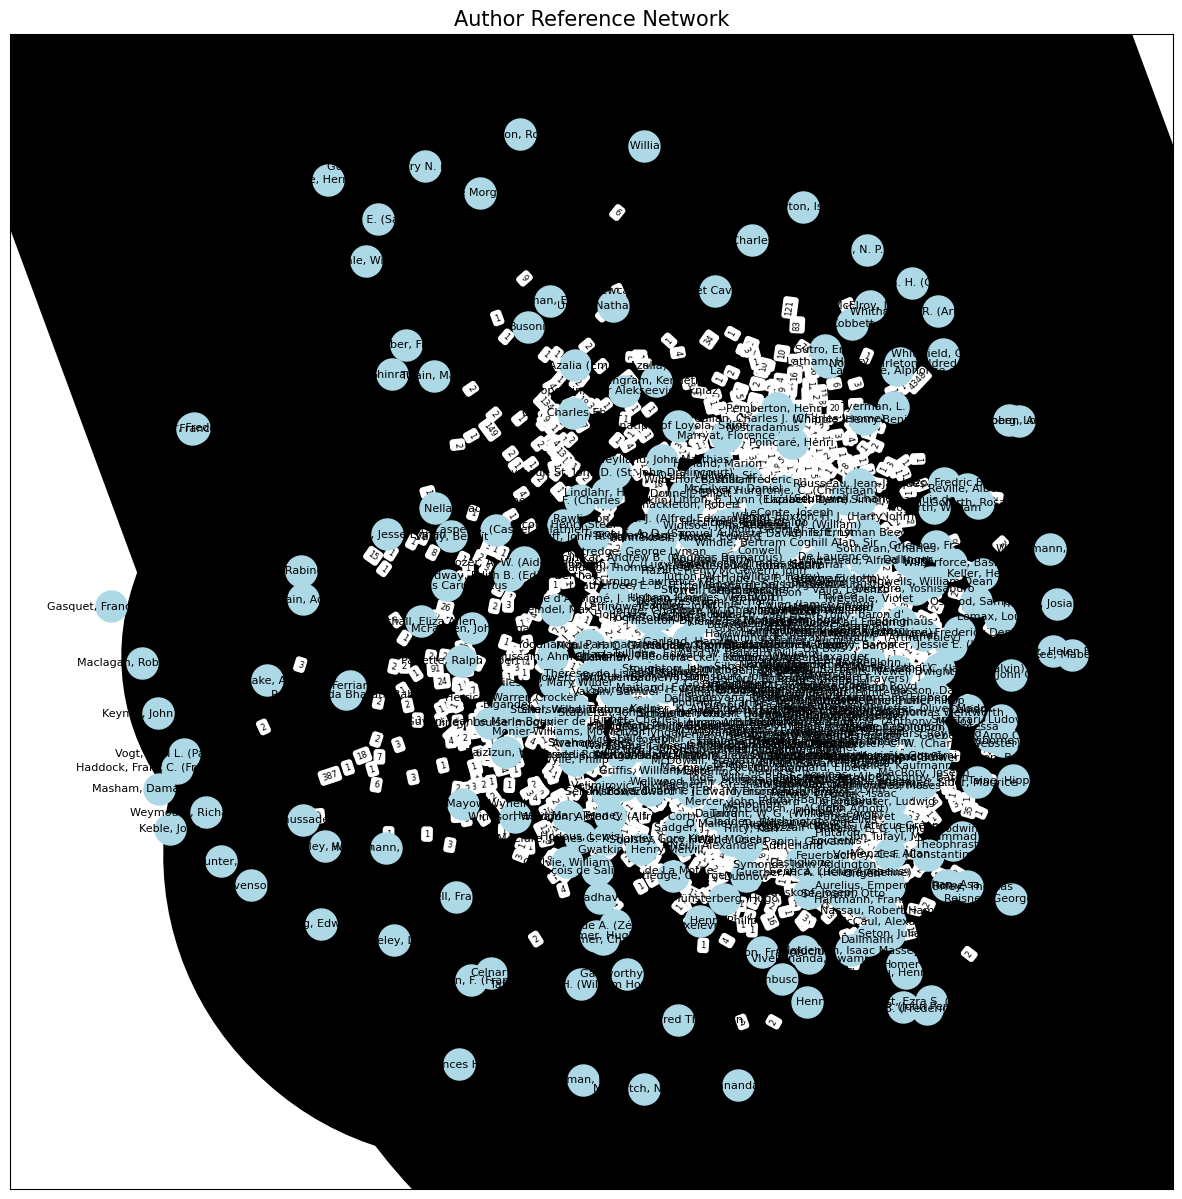

In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
input_file = 'final.csv'  # Path to the sorted references CSV
df = pd.read_csv(input_file)

# Step 1: Create a directed graph
G = nx.DiGraph()

# Step 2: Add edges from author_of_book to full_author_referenced with weights
for index, row in df.iterrows():
    author = row['author_of_book']
    referenced_author = row['full_author_referenced']
    
    # If the edge already exists, increase the weight by 1
    if G.has_edge(author, referenced_author):
        G[author][referenced_author]['weight'] += 1
    else:
        G.add_edge(author, referenced_author, weight=1)

# Step 3: Plot the graph
plt.figure(figsize=(15, 15))  # Set the plot size

# Use spring layout for positioning nodes
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

# Draw the edges (with varying width based on weight)
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle='-|>', arrowsize=10, width=[d['weight'] * 0.1 for (_, _, d) in edges])

# Draw the node labels
nx.draw_networkx_labels(G, pos, font_size=8)

# Show edge weights as labels on the graph
edge_labels = {(u, v): d['weight'] for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

# Display the graph
plt.title("Author Reference Network", fontsize=15)
plt.show()

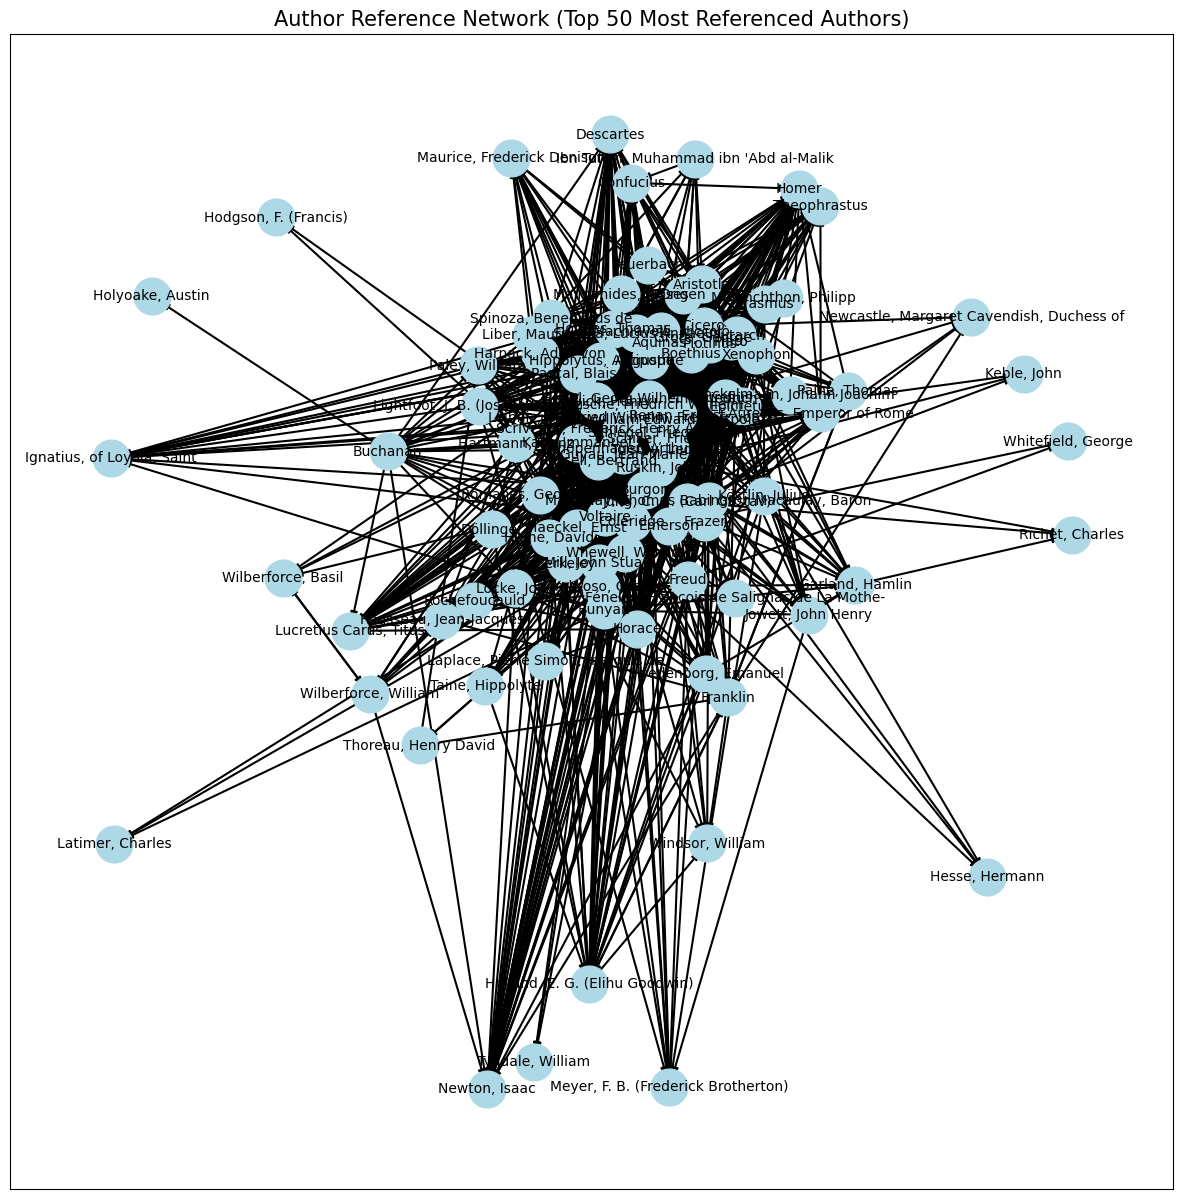

In [20]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
input_file = 'final.csv'  # Path to the sorted references CSV
df = pd.read_csv(input_file)

# Step 1: Create a matrix (pivot table) of how many times each author referenced another author
author_reference_matrix = df.pivot_table(index='author_of_book', columns='full_author_referenced', aggfunc='size', fill_value=0)

# Step 2: Count how many times each author was referenced (column sums)
authors_referenced = author_reference_matrix.sum(axis=0)

# Step 3: Get the top 50 authors who were referenced the most
top_50_authors_referenced = authors_referenced.sort_values(ascending=False).head(100).index

# Step 4: Create a filtered dataframe that only includes rows where both the author and the referenced author are in the top 50
filtered_df = df[df['author_of_book'].isin(top_50_authors_referenced) & df['full_author_referenced'].isin(top_50_authors_referenced)]

# Step 5: Create a directed graph using only the top 50 most referenced authors
G = nx.DiGraph()

# Add edges from author_of_book to full_author_referenced with weights
for index, row in filtered_df.iterrows():
    author = row['author_of_book']
    referenced_author = row['full_author_referenced']
    
    # If the edge already exists, increase the weight by 1
    if G.has_edge(author, referenced_author):
        G[author][referenced_author]['weight'] += 1
    else:
        G.add_edge(author, referenced_author, weight=1)

# Optional: Filter edges to only include those with a weight above a certain threshold (e.g., at least 2 references)
edges_to_remove = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] < 2]
G.remove_edges_from(edges_to_remove)

# Step 6: Plot the graph
plt.figure(figsize=(15, 15))  # Set the plot size

# Use spring layout for positioning nodes (with a larger `k` value for better spacing)
pos = nx.spring_layout(G, k=1.5, iterations=100)

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

# Draw the edges with a fixed width
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrowstyle='-|>', arrowsize=10, width=1.5)  # Set fixed width for all edges

# Draw the node labels
nx.draw_networkx_labels(G, pos, font_size=10)

# Display the graph
plt.title("Author Reference Network (Top 50 Most Referenced Authors)", fontsize=15)
plt.show()

In [23]:
import pandas as pd
import networkx as nx
import plotly.graph_objs as go

# Load the CSV file into a pandas DataFrame
input_file = 'final.csv'  # Path to the updated CSV file
df = pd.read_csv(input_file)

# Step 1: Create a matrix (pivot table) of how many times each author referenced another author
author_reference_matrix = df.pivot_table(index='author_of_book', columns='full_author_referenced', aggfunc='size', fill_value=0)

# Step 2: Count how many times each author was referenced (column sums)
authors_referenced = author_reference_matrix.sum(axis=0)

# Step 3: Get the top 50 authors who were referenced the most
top_50_authors_referenced = authors_referenced.sort_values(ascending=False).head(80).index

# Step 4: Create a filtered dataframe that only includes rows where both the author and the referenced author are in the top 50
filtered_df = df[df['author_of_book'].isin(top_50_authors_referenced) & df['full_author_referenced'].isin(top_50_authors_referenced)]

# Step 5: Create a directed graph using only the top 50 most referenced authors
G = nx.DiGraph()

# Add edges from author_of_book to full_author_referenced with weights
for index, row in filtered_df.iterrows():
    author = row['author_of_book']
    referenced_author = row['full_author_referenced']
    
    # If the edge already exists, increase the weight by 1
    if G.has_edge(author, referenced_author):
        G[author][referenced_author]['weight'] += 1
    else:
        G.add_edge(author, referenced_author, weight=1)

# Step 6: Use Plotly to create an interactive visualization

# Use spring layout for positioning nodes (with a larger `k` value for better spacing)
pos = nx.spring_layout(G, k=1.5, iterations=100)

# Create edge traces
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    # Use extend() instead of += to avoid type issues
    edge_trace['x'] = edge_trace['x'] + (x0, x1, None)
    edge_trace['y'] = edge_trace['y'] + (y0, y1, None)

# Create node traces with hover text
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Number of References',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += (x,)
    node_trace['y'] += (y,)

    # Set the hover text for each node
    node_trace['text'] += (node,)

# Step 7: Create the figure layout and plot it
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Author Reference Network (Top 50 Most Referenced Authors)',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=0,l=0,r=0,t=40),
                annotations=[dict(
                    text="Hover over nodes to see the author names",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 )],
                xaxis=dict(showgrid=False, zeroline=False),
                yaxis=dict(showgrid=False, zeroline=False))
                )

# Display the graph
fig.show()

In [19]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
input_file = 'final.csv'  # Path to the updated CSV file
df = pd.read_csv(input_file)

# Step 1: Create a matrix (pivot table) of how many times each author referenced another author
author_reference_matrix = df.pivot_table(index='author_of_book', columns='full_author_referenced', aggfunc='size', fill_value=0)

# Step 2: Count how many times each author was referenced (column sums)
authors_referenced = author_reference_matrix.sum(axis=0)

# Step 3: Get the top 50 authors who were referenced the most (from entire dataset)
top_50_authors_referenced = authors_referenced.sort_values(ascending=False).head(50).index

# Step 4: Filter the dataset to only include references made by and to the top 50 authors
filtered_df = df[df['author_of_book'].isin(top_50_authors_referenced) & df['full_author_referenced'].isin(top_50_authors_referenced)]

# Step 5: Recreate the matrix to reflect only the top 50 references
top_50_reference_matrix = filtered_df.pivot_table(index='author_of_book', columns='full_author_referenced', aggfunc='size', fill_value=0)

# Step 6: Count how many times each top 50 author was referenced by others in the top 50
top_50_authors_referenced_filtered = top_50_reference_matrix.sum(axis=0)

# Step 7: Find the total number of references for the top, middle, and bottom of these 50 authors
top_author_references = top_50_authors_referenced_filtered.iloc[0]  # Top 1 author
middle_author_references = top_50_authors_referenced_filtered.iloc[25]  # Middle author
bottom_author_references = top_50_authors_referenced_filtered.iloc[-1]  # Bottom author

# Print the results
print("Top Author References:", top_author_references)
print("Middle Author References:", middle_author_references)
print("Bottom Author References:", bottom_author_references)

Top Author References: 2888
Middle Author References: 104
Bottom Author References: 246


In [24]:
import pandas as pd
import networkx as nx
import plotly.graph_objs as go
import numpy as np

# Load the CSV file into a pandas DataFrame
input_file = 'final.csv'  # Path to the updated CSV file
df = pd.read_csv(input_file)

# Step 1: Create a matrix (pivot table) of how many times each author referenced another author
author_reference_matrix = df.pivot_table(index='author_of_book', columns='full_author_referenced', aggfunc='size', fill_value=0)

# Step 2: Count how many times each author was referenced (column sums)
authors_referenced = author_reference_matrix.sum(axis=0)

# Step 3: Get the top 50 authors who were referenced the most (from the entire dataset)
top_50_authors_referenced = authors_referenced.sort_values(ascending=False).head(50).index

# Step 4: Filter the dataset to only include references made by and to the top 50 authors
filtered_df = df[df['author_of_book'].isin(top_50_authors_referenced) & df['full_author_referenced'].isin(top_50_authors_referenced)]

# Step 5: Recreate the matrix to reflect only the top 50 references
top_50_reference_matrix = filtered_df.pivot_table(index='author_of_book', columns='full_author_referenced', aggfunc='size', fill_value=0)

# Step 6: Count how many times each top 50 author was referenced by others in the top 50
top_50_authors_referenced_filtered = top_50_reference_matrix.sum(axis=0)

# Step 7: Create a directed graph using only the top 50 most referenced authors
G = nx.DiGraph()

# Add edges from author_of_book to full_author_referenced with weights
for index, row in filtered_df.iterrows():
    author = row['author_of_book']
    referenced_author = row['full_author_referenced']
    
    # If the edge already exists, increase the weight by 1
    if G.has_edge(author, referenced_author):
        G[author][referenced_author]['weight'] += 1
    else:
        G.add_edge(author, referenced_author, weight=1)

# Step 8: Normalize reference counts for color coding (map 50 - 2,000 reference range to 0 - 1)
min_ref, max_ref = 50, 2000
normalized_reference_counts = (top_50_authors_referenced_filtered - min_ref) / (max_ref - min_ref)
normalized_reference_counts = np.clip(normalized_reference_counts, 0, 1)  # Clip to keep within [0, 1]

# Step 9: Use Plotly to create an interactive visualization

# Use spring layout for positioning nodes (with a larger `k` value for better spacing)
pos = nx.spring_layout(G, k=1.5, iterations=100)

# Create edge traces
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] = edge_trace['x'] + (x0, x1, None)
    edge_trace['y'] = edge_trace['y'] + (y0, y1, None)

# Create node traces with hover text and color based on reference counts
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',  # Use a colorscale that goes from light to dark
        cmin=0,  # Minimum value for the color scale (corresponding to min reference count)
        cmax=1,  # Maximum value for the color scale (corresponding to max reference count)
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Number of References',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

# Add node positions and colors based on reference counts
for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += (x,)
    node_trace['y'] += (y,)

    # Set the hover text for each node and map the normalized reference count to the color
    node_trace['text'] += (node,)
    node_trace['marker']['color'] += (normalized_reference_counts[node],)

# Step 10: Create the figure layout and plot it
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Author Reference Network (Top 50 Most Referenced Authors)',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=0,l=0,r=0,t=40),
                annotations=[dict(
                    text="Hover over nodes to see the author names",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 )],
                xaxis=dict(showgrid=False, zeroline=False),
                yaxis=dict(showgrid=False, zeroline=False))
                )

# Display the graph
fig.show()